# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [28]:
data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

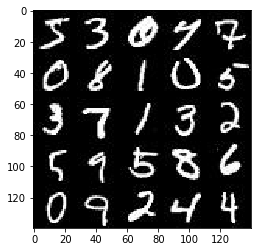

In [29]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

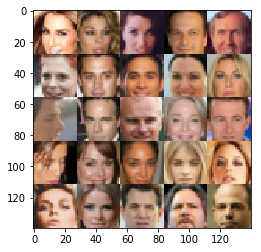

In [30]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [31]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.0.0


C:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel\__main__.py:14: UserWarning: No GPU found. Please use a GPU to train your neural network.


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [33]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
#TO test

    # TODO: Implement Function
    tensah = tf.placeholder(tf.float32, (None,image_width,image_height,image_channels),name='tensah') 
    zdata = tf.placeholder(tf.float32, (None,z_dim),name='zdata')
    learnrate = tf.placeholder(tf.float32, None, name="learnrate")
    return tensah, zdata, learnrate



"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variabes in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the generator, tensor logits of the generator).

In [34]:
def discriminator(images, reuse=False):
    """
    Create the discriminator network
    :param image: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function

    alpha = 0.02
    
    with tf.variable_scope('discriminator', reuse=reuse):
        #32x32x3
        l1 = tf.layers.conv2d(images, 64, 5, strides=2, padding='same')
        relu1 = tf.maximum(alpha * l1, l1)
        
        # 16x16x32
        l2 = tf.layers.conv2d(relu1, 128, 5, strides=2, padding='same')
        batchnorm = tf.layers.batch_normalization(l2, training=True)
        relu2 = tf.maximum(alpha * batchnorm, batchnorm)
        
        # 8x8x128
        l3 = tf.layers.conv2d(relu2, 256, 5, strides=2, padding='same')
        batchnorm2 = tf.layers.batch_normalization(l3, training=True)
        relu3 = tf.maximum(alpha * batchnorm2, batchnorm2)
        

        # 4x4x256
        rs = tf.reshape(relu3, (-1, 4*4*256))
        logits = tf.layers.dense(rs, 1)
        out = tf.sigmoid(logits)
        
    return out, logits


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variabes in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [36]:
def generator(z, out_channel_dim, is_train=True):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # TODO: Implement Function
    
    alpha = 0.02
    
    with tf.variable_scope('generator', reuse=not(is_train)):
        layer1 = tf.layers.dense(z, 2*2*512, activation=None)

        layer1 = tf.reshape(layer1, (-1, 2, 2, 512))
        layer1 = tf.layers.batch_normalization(layer1, training=is_train)
        layer1 = tf.maximum(alpha * layer1, layer1)
        
        layer2 = tf.layers.conv2d_transpose(layer1, 256, 5, strides=2, padding='valid')
        layer2 = tf.layers.batch_normalization(layer2, training=is_train)
        layer2 = tf.maximum(alpha * layer2, layer2)
        
        layer3 = tf.layers.conv2d_transpose(layer2, 128, 5, strides=2, padding='same')
        layer3 = tf.layers.batch_normalization(layer3, training=is_train)
        layer3 = tf.maximum(alpha * layer3, layer3)

        logits = tf.layers.conv2d_transpose(layer3, out_channel_dim, 5, strides=2, padding='same')
        
        out = tf.tanh(logits)

        return out


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [37]:
def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    g_model = generator(input_z, out_channel_dim)
    d_model_real, d_logits_real = discriminator(input_real)
    d_model_fake, d_logits_fake = discriminator(g_model, reuse=True)

    d_loss_real = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_real, labels=tf.ones_like(d_model_real)))
    d_loss_fake = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.zeros_like(d_model_fake)))
    g_loss = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.ones_like(d_model_fake)))

    d_loss = d_loss_real + d_loss_fake

    return d_loss, g_loss


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [43]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    
    trainvars = tf.trainable_variables()
    disvars = [var for var in trainvars if var.name.startswith('discriminator')]
    genvars = [var for var in trainvars if var.name.startswith('generator')]
    all_update_ops = tf.get_collection(tf.GraphKeys.UPDATE_OPS)
    
    g_update_ops = [var for var in all_update_ops if var.name.startswith('generator')]
    d_update_ops = [var for var in all_update_ops if var.name.startswith('discriminator')]

    with tf.control_dependencies(d_update_ops):
        d_train = tf.train.AdamOptimizer(learning_rate, beta1 = beta1).minimize(d_loss, var_list = disvars)

    with tf.control_dependencies(g_update_ops):
        g_train = tf.train.AdamOptimizer(learning_rate, beta1 = beta1).minimize(g_loss, var_list = genvars)

    return d_train, g_train


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [44]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [45]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model
    input_real, input_z, lr_placeholder = model_inputs(data_shape[1], data_shape[2], data_shape[3], z_dim)
    steps = 0
    d_loss, g_loss = model_loss(input_real, input_z, data_shape[3])
    d_opt, g_opt = model_opt(d_loss, g_loss, learning_rate, beta1)
        
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for e in range(epochs):
            for batch_images in get_batches(batch_size):
                steps += 1

                batch_z = np.random.uniform(-1, 1, size=(batch_size, z_dim))

                _ = sess.run(d_opt, feed_dict={input_real: batch_images, input_z: batch_z})
                _ = sess.run(g_opt, feed_dict={input_z: batch_z, lr_placeholder: learning_rate, input_real: batch_images})


                if steps % 25 == 0:
                    train_loss_d = d_loss.eval({input_z: batch_z, input_real: batch_images})
                    train_loss_g = g_loss.eval({input_z: batch_z})

                    print("Epoch {}/{}...".format(e+1, epochs),
                          "Discriminator Loss: {:.4f}...".format(train_loss_d),
                          "Generator Loss: {:.4f}".format(train_loss_g))

                if steps % 100 == 0:
                    show_generator_output(sess, 1, input_z, data_shape[3], data_image_mode)
                

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

Epoch 1/2... Discriminator Loss: 1.1846... Generator Loss: 4.0520
Epoch 1/2... Discriminator Loss: 1.5600... Generator Loss: 8.7811
Epoch 1/2... Discriminator Loss: 0.2189... Generator Loss: 2.0339
Epoch 1/2... Discriminator Loss: 0.3707... Generator Loss: 1.3440


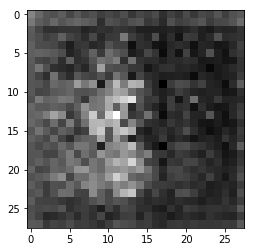

Epoch 1/2... Discriminator Loss: 0.2403... Generator Loss: 1.9538
Epoch 1/2... Discriminator Loss: 0.5554... Generator Loss: 1.0135
Epoch 1/2... Discriminator Loss: 0.2025... Generator Loss: 2.4412
Epoch 1/2... Discriminator Loss: 0.3902... Generator Loss: 1.6753


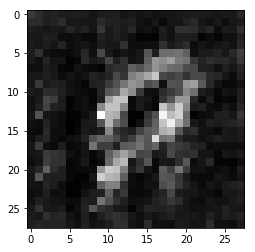

Epoch 1/2... Discriminator Loss: 0.4847... Generator Loss: 9.0224
Epoch 1/2... Discriminator Loss: 0.1895... Generator Loss: 2.5112
Epoch 1/2... Discriminator Loss: 0.2480... Generator Loss: 4.9363
Epoch 1/2... Discriminator Loss: 1.4026... Generator Loss: 0.3826


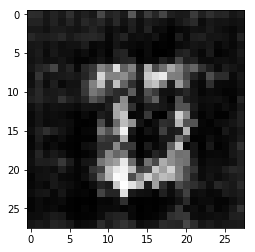

Epoch 1/2... Discriminator Loss: 0.3835... Generator Loss: 1.6095
Epoch 1/2... Discriminator Loss: 0.2136... Generator Loss: 4.4298
Epoch 1/2... Discriminator Loss: 0.2295... Generator Loss: 3.4690
Epoch 1/2... Discriminator Loss: 0.3165... Generator Loss: 2.0132


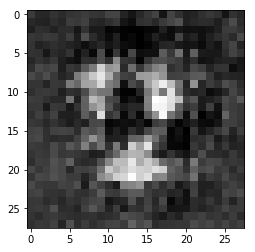

Epoch 1/2... Discriminator Loss: 0.7415... Generator Loss: 0.9633
Epoch 1/2... Discriminator Loss: 0.2998... Generator Loss: 3.5514
Epoch 1/2... Discriminator Loss: 2.8864... Generator Loss: 8.9090
Epoch 1/2... Discriminator Loss: 0.1913... Generator Loss: 3.2110


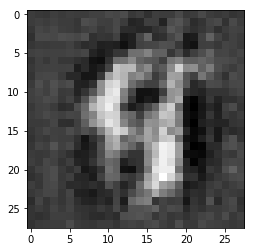

Epoch 1/2... Discriminator Loss: 0.8814... Generator Loss: 0.6570
Epoch 1/2... Discriminator Loss: 0.6082... Generator Loss: 1.0193
Epoch 1/2... Discriminator Loss: 0.0488... Generator Loss: 5.0343
Epoch 1/2... Discriminator Loss: 0.1189... Generator Loss: 3.5711


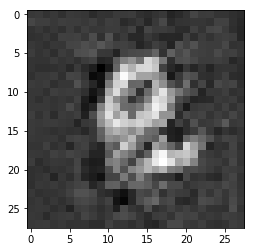

Epoch 1/2... Discriminator Loss: 0.1124... Generator Loss: 2.7463
Epoch 1/2... Discriminator Loss: 1.5854... Generator Loss: 0.3172
Epoch 1/2... Discriminator Loss: 0.3111... Generator Loss: 1.8816
Epoch 1/2... Discriminator Loss: 0.2626... Generator Loss: 4.3881


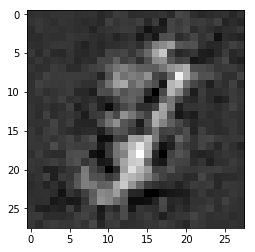

Epoch 1/2... Discriminator Loss: 0.3416... Generator Loss: 1.5091
Epoch 1/2... Discriminator Loss: 0.1890... Generator Loss: 2.2898
Epoch 1/2... Discriminator Loss: 0.1435... Generator Loss: 2.2635
Epoch 1/2... Discriminator Loss: 0.1956... Generator Loss: 2.0512


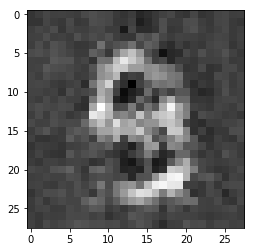

Epoch 1/2... Discriminator Loss: 0.0664... Generator Loss: 3.2095
Epoch 1/2... Discriminator Loss: 0.0419... Generator Loss: 10.6244
Epoch 1/2... Discriminator Loss: 0.1456... Generator Loss: 2.5637
Epoch 1/2... Discriminator Loss: 0.0813... Generator Loss: 4.2569


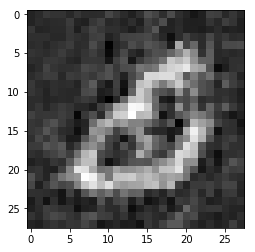

Epoch 1/2... Discriminator Loss: 0.0248... Generator Loss: 4.5501
Epoch 1/2... Discriminator Loss: 0.0473... Generator Loss: 3.3768
Epoch 1/2... Discriminator Loss: 0.0420... Generator Loss: 3.8544
Epoch 1/2... Discriminator Loss: 0.0194... Generator Loss: 4.3332


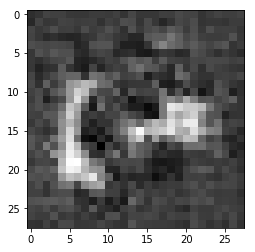

Epoch 1/2... Discriminator Loss: 0.0111... Generator Loss: 4.9266
Epoch 1/2... Discriminator Loss: 0.0440... Generator Loss: 3.8695
Epoch 1/2... Discriminator Loss: 0.0461... Generator Loss: 5.0897
Epoch 1/2... Discriminator Loss: 0.1021... Generator Loss: 3.1689


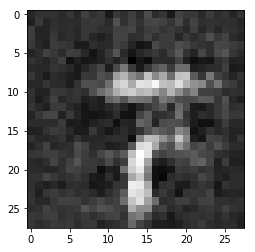

Epoch 1/2... Discriminator Loss: 0.1062... Generator Loss: 2.5364
Epoch 1/2... Discriminator Loss: 0.0385... Generator Loss: 3.9620
Epoch 1/2... Discriminator Loss: 0.0420... Generator Loss: 3.7943
Epoch 1/2... Discriminator Loss: 0.0348... Generator Loss: 4.4987


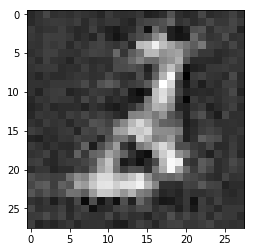

Epoch 1/2... Discriminator Loss: 0.0446... Generator Loss: 4.0053
Epoch 1/2... Discriminator Loss: 0.0404... Generator Loss: 3.8482
Epoch 1/2... Discriminator Loss: 0.0481... Generator Loss: 3.6032
Epoch 1/2... Discriminator Loss: 0.0336... Generator Loss: 3.7288


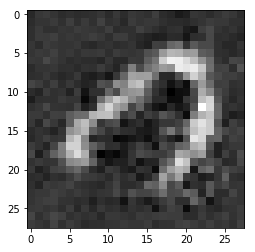

Epoch 1/2... Discriminator Loss: 0.0228... Generator Loss: 4.1415
Epoch 1/2... Discriminator Loss: 0.0150... Generator Loss: 5.7717
Epoch 1/2... Discriminator Loss: 0.1715... Generator Loss: 22.5418
Epoch 1/2... Discriminator Loss: 0.0655... Generator Loss: 12.3267


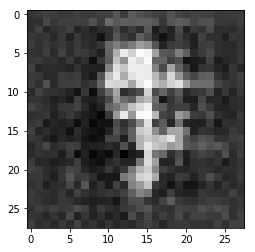

Epoch 1/2... Discriminator Loss: 0.0904... Generator Loss: 3.0584
Epoch 1/2... Discriminator Loss: 0.0526... Generator Loss: 3.5562
Epoch 1/2... Discriminator Loss: 0.0646... Generator Loss: 3.3970
Epoch 1/2... Discriminator Loss: 0.0299... Generator Loss: 3.9383


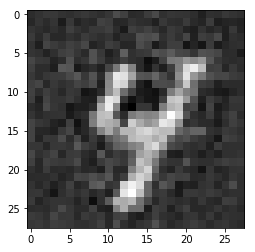

Epoch 1/2... Discriminator Loss: 0.0295... Generator Loss: 4.4606
Epoch 1/2... Discriminator Loss: 0.0573... Generator Loss: 3.3981
Epoch 1/2... Discriminator Loss: 0.0538... Generator Loss: 3.5045
Epoch 1/2... Discriminator Loss: 0.0313... Generator Loss: 4.1881


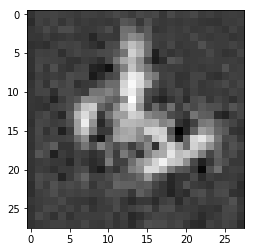

Epoch 1/2... Discriminator Loss: 0.0496... Generator Loss: 5.8071
Epoch 1/2... Discriminator Loss: 0.0868... Generator Loss: 2.6919
Epoch 1/2... Discriminator Loss: 0.0326... Generator Loss: 3.9237
Epoch 1/2... Discriminator Loss: 0.0283... Generator Loss: 3.9199


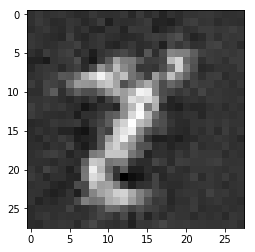

Epoch 1/2... Discriminator Loss: 0.0230... Generator Loss: 4.7710
Epoch 1/2... Discriminator Loss: 0.0204... Generator Loss: 4.5549
Epoch 1/2... Discriminator Loss: 0.0229... Generator Loss: 4.5908
Epoch 1/2... Discriminator Loss: 0.4158... Generator Loss: 2.9192


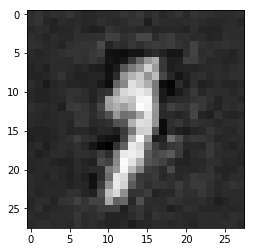

Epoch 1/2... Discriminator Loss: 0.0519... Generator Loss: 5.0910
Epoch 1/2... Discriminator Loss: 0.1464... Generator Loss: 8.6332
Epoch 1/2... Discriminator Loss: 0.0383... Generator Loss: 4.3746
Epoch 2/2... Discriminator Loss: 0.0108... Generator Loss: 14.0130


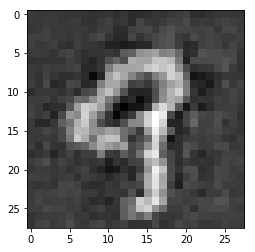

Epoch 2/2... Discriminator Loss: 0.0661... Generator Loss: 3.0462
Epoch 2/2... Discriminator Loss: 0.0078... Generator Loss: 5.6732
Epoch 2/2... Discriminator Loss: 0.0237... Generator Loss: 4.1970
Epoch 2/2... Discriminator Loss: 0.0191... Generator Loss: 5.0819


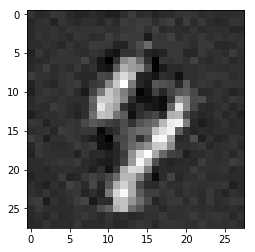

Epoch 2/2... Discriminator Loss: 0.0323... Generator Loss: 4.1952
Epoch 2/2... Discriminator Loss: 0.0980... Generator Loss: 2.6479
Epoch 2/2... Discriminator Loss: 0.1855... Generator Loss: 1.9447
Epoch 2/2... Discriminator Loss: 0.0863... Generator Loss: 3.2424


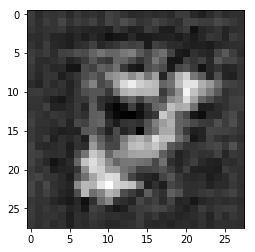

Epoch 2/2... Discriminator Loss: 0.0413... Generator Loss: 3.8500
Epoch 2/2... Discriminator Loss: 0.0299... Generator Loss: 4.1880
Epoch 2/2... Discriminator Loss: 0.1655... Generator Loss: 2.1462
Epoch 2/2... Discriminator Loss: 0.0474... Generator Loss: 3.7274


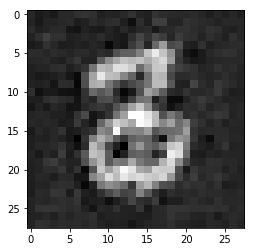

Epoch 2/2... Discriminator Loss: 0.0357... Generator Loss: 4.5749
Epoch 2/2... Discriminator Loss: 0.0312... Generator Loss: 3.8333
Epoch 2/2... Discriminator Loss: 0.0199... Generator Loss: 6.1359
Epoch 2/2... Discriminator Loss: 0.0190... Generator Loss: 4.4570


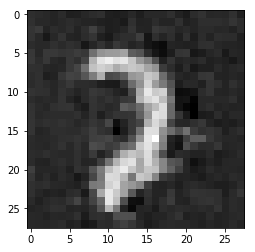

Epoch 2/2... Discriminator Loss: 0.0630... Generator Loss: 2.9504
Epoch 2/2... Discriminator Loss: 0.0122... Generator Loss: 5.0662
Epoch 2/2... Discriminator Loss: 0.0117... Generator Loss: 5.6951
Epoch 2/2... Discriminator Loss: 0.0692... Generator Loss: 4.7914


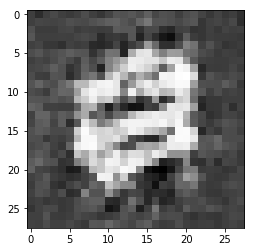

Epoch 2/2... Discriminator Loss: 0.0486... Generator Loss: 4.5751
Epoch 2/2... Discriminator Loss: 0.0309... Generator Loss: 3.7325
Epoch 2/2... Discriminator Loss: 0.0297... Generator Loss: 4.0517
Epoch 2/2... Discriminator Loss: 0.0206... Generator Loss: 4.7244


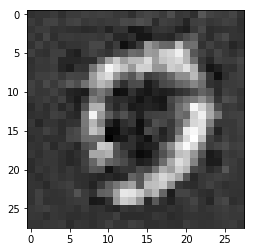

Epoch 2/2... Discriminator Loss: 0.0129... Generator Loss: 5.7276
Epoch 2/2... Discriminator Loss: 0.0916... Generator Loss: 3.0776
Epoch 2/2... Discriminator Loss: 0.5325... Generator Loss: 3.0151
Epoch 2/2... Discriminator Loss: 0.2396... Generator Loss: 1.7564


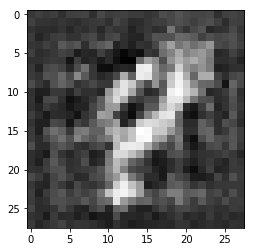

Epoch 2/2... Discriminator Loss: 0.0694... Generator Loss: 3.6679
Epoch 2/2... Discriminator Loss: 0.0384... Generator Loss: 3.7979
Epoch 2/2... Discriminator Loss: 0.0802... Generator Loss: 5.6018
Epoch 2/2... Discriminator Loss: 0.0713... Generator Loss: 3.4231


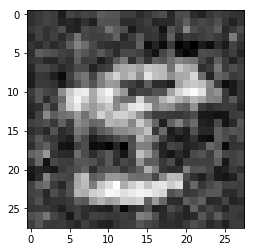

Epoch 2/2... Discriminator Loss: 0.0585... Generator Loss: 3.2995
Epoch 2/2... Discriminator Loss: 0.1262... Generator Loss: 2.4382
Epoch 2/2... Discriminator Loss: 0.2446... Generator Loss: 1.6762
Epoch 2/2... Discriminator Loss: 0.0360... Generator Loss: 5.8751


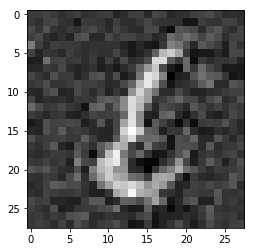

Epoch 2/2... Discriminator Loss: 0.1310... Generator Loss: 2.5670
Epoch 2/2... Discriminator Loss: 0.2070... Generator Loss: 1.9112
Epoch 2/2... Discriminator Loss: 0.0519... Generator Loss: 3.5649
Epoch 2/2... Discriminator Loss: 0.0321... Generator Loss: 4.1166


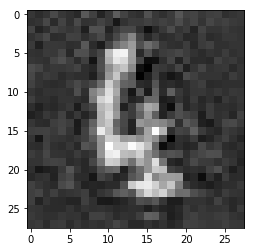

Epoch 2/2... Discriminator Loss: 0.0297... Generator Loss: 4.3132
Epoch 2/2... Discriminator Loss: 0.0504... Generator Loss: 3.5483
Epoch 2/2... Discriminator Loss: 0.2234... Generator Loss: 2.5169
Epoch 2/2... Discriminator Loss: 0.0300... Generator Loss: 5.6701


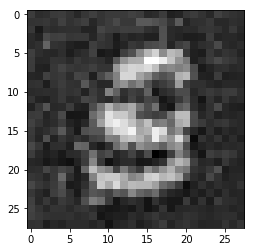

Epoch 2/2... Discriminator Loss: 0.0174... Generator Loss: 5.4330
Epoch 2/2... Discriminator Loss: 0.0194... Generator Loss: 4.5361
Epoch 2/2... Discriminator Loss: 0.0634... Generator Loss: 2.9756
Epoch 2/2... Discriminator Loss: 0.1543... Generator Loss: 2.1312


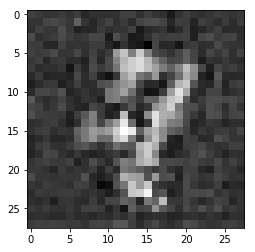

Epoch 2/2... Discriminator Loss: 0.0438... Generator Loss: 4.0880
Epoch 2/2... Discriminator Loss: 0.0164... Generator Loss: 4.5376
Epoch 2/2... Discriminator Loss: 0.0616... Generator Loss: 3.3572
Epoch 2/2... Discriminator Loss: 0.0110... Generator Loss: 5.5717


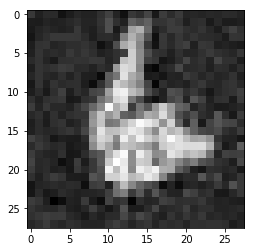

Epoch 2/2... Discriminator Loss: 0.0134... Generator Loss: 4.8574
Epoch 2/2... Discriminator Loss: 0.0579... Generator Loss: 3.5597
Epoch 2/2... Discriminator Loss: 0.0378... Generator Loss: 3.8925
Epoch 2/2... Discriminator Loss: 0.0224... Generator Loss: 4.3369


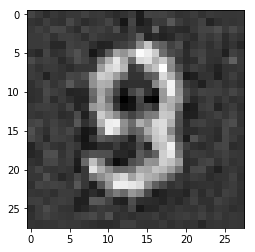

Epoch 2/2... Discriminator Loss: 0.0127... Generator Loss: 5.4888
Epoch 2/2... Discriminator Loss: 0.0313... Generator Loss: 4.0028
Epoch 2/2... Discriminator Loss: 0.0048... Generator Loss: 6.4314
Epoch 2/2... Discriminator Loss: 0.0452... Generator Loss: 3.8439


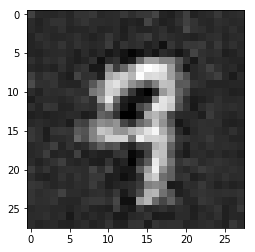

Epoch 2/2... Discriminator Loss: 0.0514... Generator Loss: 3.3674
Epoch 2/2... Discriminator Loss: 0.2613... Generator Loss: 10.2592
Epoch 2/2... Discriminator Loss: 0.0371... Generator Loss: 3.9616
Epoch 2/2... Discriminator Loss: 0.0129... Generator Loss: 6.9703


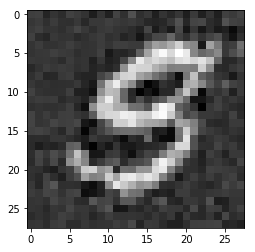

Epoch 2/2... Discriminator Loss: 0.0764... Generator Loss: 2.8758
Epoch 2/2... Discriminator Loss: 0.0561... Generator Loss: 3.2504
Epoch 2/2... Discriminator Loss: 0.0185... Generator Loss: 4.5988
Epoch 2/2... Discriminator Loss: 2.3814... Generator Loss: 18.0431


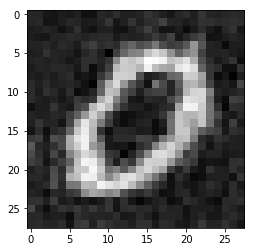

Epoch 2/2... Discriminator Loss: 0.0406... Generator Loss: 3.7227
Epoch 2/2... Discriminator Loss: 0.0202... Generator Loss: 4.9552
Epoch 2/2... Discriminator Loss: 0.0421... Generator Loss: 3.5090
Epoch 2/2... Discriminator Loss: 0.3155... Generator Loss: 1.4647


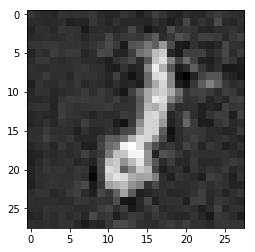

Epoch 2/2... Discriminator Loss: 0.0342... Generator Loss: 3.8003
Epoch 2/2... Discriminator Loss: 0.0271... Generator Loss: 4.6614


In [48]:
batch_size = 32
z_dim = 100
learning_rate = 0.0002
beta1 = 0.3


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

Epoch 1/1... Discriminator Loss: 0.2458... Generator Loss: 3.6707
Epoch 1/1... Discriminator Loss: 0.2936... Generator Loss: 6.9531
Epoch 1/1... Discriminator Loss: 0.3400... Generator Loss: 1.4566
Epoch 1/1... Discriminator Loss: 0.3201... Generator Loss: 9.6644


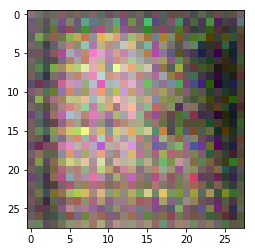

Epoch 1/1... Discriminator Loss: 1.3365... Generator Loss: 12.3611
Epoch 1/1... Discriminator Loss: 0.1313... Generator Loss: 2.7451
Epoch 1/1... Discriminator Loss: 0.0970... Generator Loss: 2.9528
Epoch 1/1... Discriminator Loss: 0.1268... Generator Loss: 3.0617


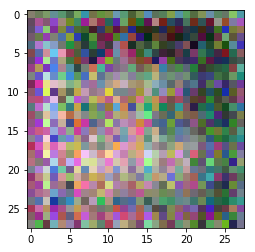

Epoch 1/1... Discriminator Loss: 0.1134... Generator Loss: 6.6985
Epoch 1/1... Discriminator Loss: 0.1807... Generator Loss: 2.0826
Epoch 1/1... Discriminator Loss: 0.0731... Generator Loss: 3.4166
Epoch 1/1... Discriminator Loss: 0.0945... Generator Loss: 2.6054


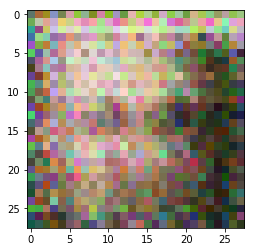

Epoch 1/1... Discriminator Loss: 0.1998... Generator Loss: 1.8695
Epoch 1/1... Discriminator Loss: 0.0886... Generator Loss: 4.0124
Epoch 1/1... Discriminator Loss: 0.7726... Generator Loss: 0.8688
Epoch 1/1... Discriminator Loss: 0.5284... Generator Loss: 1.3185


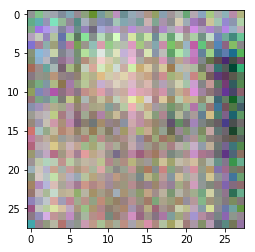

Epoch 1/1... Discriminator Loss: 0.1997... Generator Loss: 2.4621
Epoch 1/1... Discriminator Loss: 0.6614... Generator Loss: 4.7880
Epoch 1/1... Discriminator Loss: 0.1754... Generator Loss: 2.9183
Epoch 1/1... Discriminator Loss: 0.0417... Generator Loss: 5.5412


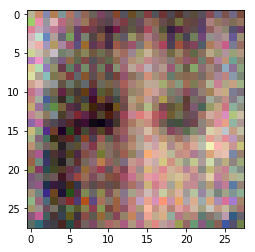

Epoch 1/1... Discriminator Loss: 0.5957... Generator Loss: 3.3809
Epoch 1/1... Discriminator Loss: 0.7981... Generator Loss: 5.9315
Epoch 1/1... Discriminator Loss: 0.1121... Generator Loss: 7.8470
Epoch 1/1... Discriminator Loss: 0.0721... Generator Loss: 3.4582


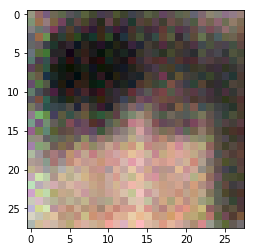

Epoch 1/1... Discriminator Loss: 0.0728... Generator Loss: 4.4807
Epoch 1/1... Discriminator Loss: 0.1522... Generator Loss: 2.5721
Epoch 1/1... Discriminator Loss: 0.0098... Generator Loss: 16.7328
Epoch 1/1... Discriminator Loss: 0.0647... Generator Loss: 3.7147


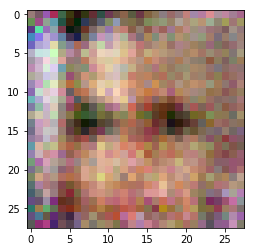

Epoch 1/1... Discriminator Loss: 0.1118... Generator Loss: 4.2414
Epoch 1/1... Discriminator Loss: 0.5404... Generator Loss: 2.7417
Epoch 1/1... Discriminator Loss: 0.2581... Generator Loss: 3.6503
Epoch 1/1... Discriminator Loss: 0.0236... Generator Loss: 5.3184


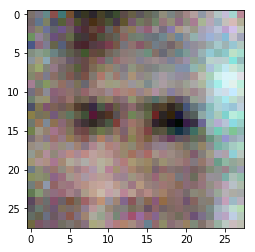

Epoch 1/1... Discriminator Loss: 0.5966... Generator Loss: 2.3397
Epoch 1/1... Discriminator Loss: 0.0561... Generator Loss: 5.4351
Epoch 1/1... Discriminator Loss: 0.1195... Generator Loss: 3.2003
Epoch 1/1... Discriminator Loss: 0.0839... Generator Loss: 4.5305


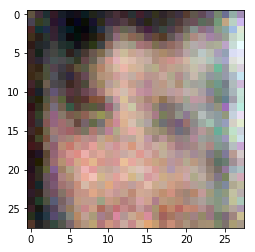

Epoch 1/1... Discriminator Loss: 0.1535... Generator Loss: 2.2078
Epoch 1/1... Discriminator Loss: 0.0499... Generator Loss: 5.3181
Epoch 1/1... Discriminator Loss: 0.1822... Generator Loss: 2.5070
Epoch 1/1... Discriminator Loss: 0.2582... Generator Loss: 1.9024


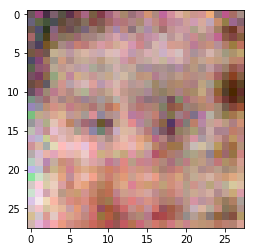

Epoch 1/1... Discriminator Loss: 0.2138... Generator Loss: 4.0362
Epoch 1/1... Discriminator Loss: 0.0402... Generator Loss: 3.8332
Epoch 1/1... Discriminator Loss: 0.1013... Generator Loss: 7.2201
Epoch 1/1... Discriminator Loss: 0.0582... Generator Loss: 3.3661


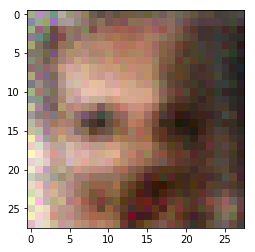

Epoch 1/1... Discriminator Loss: 0.0847... Generator Loss: 5.9181
Epoch 1/1... Discriminator Loss: 0.0206... Generator Loss: 5.6270
Epoch 1/1... Discriminator Loss: 0.0304... Generator Loss: 4.8777
Epoch 1/1... Discriminator Loss: 0.1672... Generator Loss: 3.1871


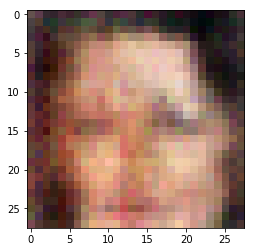

Epoch 1/1... Discriminator Loss: 0.1845... Generator Loss: 3.1383
Epoch 1/1... Discriminator Loss: 0.2186... Generator Loss: 2.3160
Epoch 1/1... Discriminator Loss: 0.3273... Generator Loss: 2.1696
Epoch 1/1... Discriminator Loss: 0.0654... Generator Loss: 3.7828


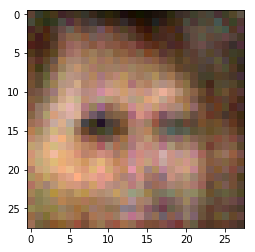

Epoch 1/1... Discriminator Loss: 0.0443... Generator Loss: 10.2967
Epoch 1/1... Discriminator Loss: 0.1661... Generator Loss: 2.3475
Epoch 1/1... Discriminator Loss: 0.3110... Generator Loss: 1.9197
Epoch 1/1... Discriminator Loss: 0.3709... Generator Loss: 4.4769


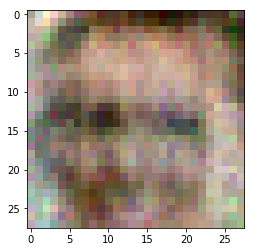

Epoch 1/1... Discriminator Loss: 0.0492... Generator Loss: 5.1268
Epoch 1/1... Discriminator Loss: 0.2400... Generator Loss: 1.9160
Epoch 1/1... Discriminator Loss: 0.1875... Generator Loss: 2.5005
Epoch 1/1... Discriminator Loss: 0.1813... Generator Loss: 9.3304


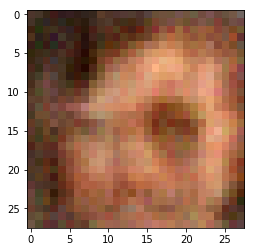

Epoch 1/1... Discriminator Loss: 0.1180... Generator Loss: 3.2865
Epoch 1/1... Discriminator Loss: 0.0742... Generator Loss: 6.7079
Epoch 1/1... Discriminator Loss: 0.6663... Generator Loss: 2.1458
Epoch 1/1... Discriminator Loss: 0.7537... Generator Loss: 1.1470


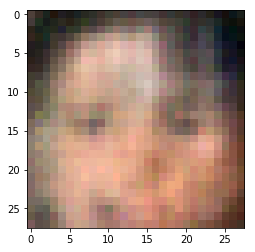

Epoch 1/1... Discriminator Loss: 0.1213... Generator Loss: 3.4691
Epoch 1/1... Discriminator Loss: 0.3519... Generator Loss: 1.8061
Epoch 1/1... Discriminator Loss: 0.4030... Generator Loss: 7.2077
Epoch 1/1... Discriminator Loss: 0.2556... Generator Loss: 2.7829


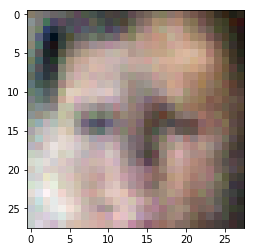

Epoch 1/1... Discriminator Loss: 0.2205... Generator Loss: 2.6836
Epoch 1/1... Discriminator Loss: 0.2574... Generator Loss: 2.2464
Epoch 1/1... Discriminator Loss: 0.2440... Generator Loss: 2.9414
Epoch 1/1... Discriminator Loss: 0.1483... Generator Loss: 2.8945


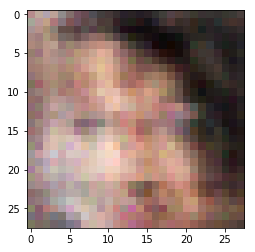

Epoch 1/1... Discriminator Loss: 0.1656... Generator Loss: 2.8388
Epoch 1/1... Discriminator Loss: 0.0438... Generator Loss: 4.6504
Epoch 1/1... Discriminator Loss: 0.3472... Generator Loss: 1.7742


In [ ]:
batch_size = 32
z_dim = 100
learning_rate = 0.0002
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.